In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Aryan\Desktop\Algerian_forestfires.csv", skiprows=1)  # Adjust skiprows if needed
print(df.head()) 
df.columns = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
df = df[pd.to_numeric(df['year'], errors='coerce').notnull()]
df['day'] = pd.to_numeric(df['day'], errors='coerce').fillna(0).astype(int)
df['month'] = pd.to_numeric(df['month'], errors='coerce').fillna(0).astype(int)
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)


numeric_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.strip(), errors='coerce')  # Strip leading/trailing spaces and convert to numeric
print("Missing values in each column:")
print(df.isnull().sum())
df_clean = df.dropna()

print(df_clean.info())
print(df_clean.head())

  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     
Missing values in each column:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  

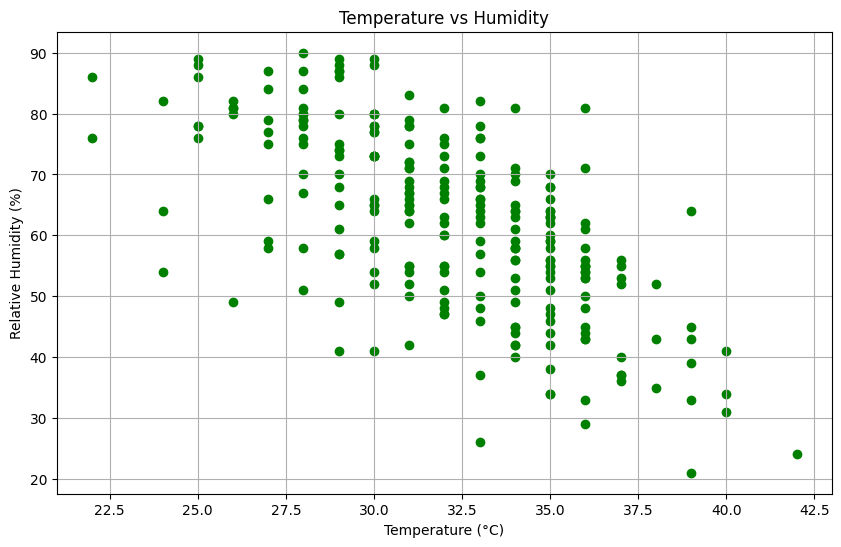

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Temperature'], df_clean['RH'], color='g')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

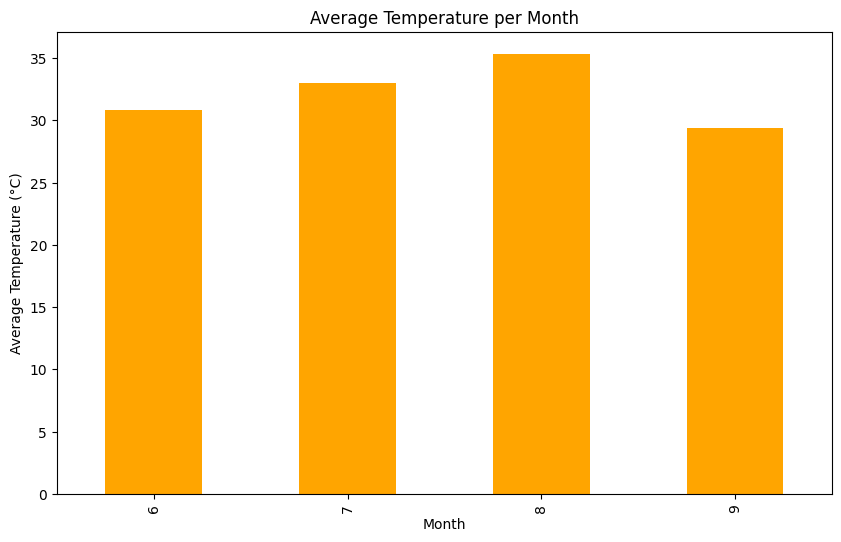

In [4]:
plt.figure(figsize=(10, 6))
avg_temp_by_month = df_clean.groupby('month')['Temperature'].mean()
avg_temp_by_month.plot(kind='bar', color='orange')
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

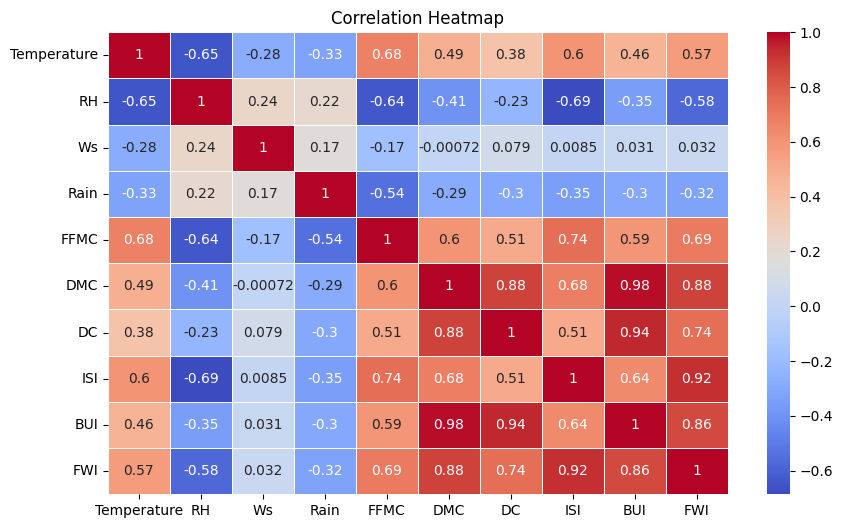

In [5]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_clean[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

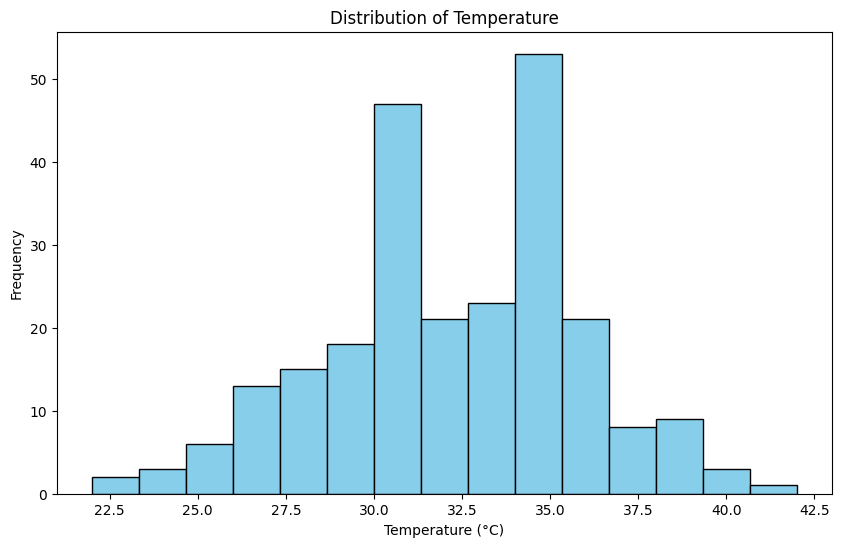

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Temperature'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def find_best_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {'MSE': mse, 'R-squared': r2}
    
    best_model = max(results, key=lambda model: results[model]['R-squared'])
    
    print(f"Best Model: {best_model}")
    print(f"Performance of {best_model}:")
    print(f"MSE: {results[best_model]['MSE']}")
    print(f"R-squared: {results[best_model]['R-squared']}")
    
    return models[best_model]
X = df_clean[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]  # Independent variables
y = df_clean['Temperature']  # Target variable

best_model = find_best_regression(X, y)

Best Model: Gradient Boosting
Performance of Gradient Boosting:
MSE: 3.9469576999782365
R-squared: 0.6819063695741223


Temperature              1.000000
Predicted_Temperature    0.945132
FFMC                     0.676568
ISI                      0.603871
FWI                      0.566670
DMC                      0.485687
BUI                      0.459789
DC                       0.376284
day                      0.097227
month                   -0.056781
Ws                      -0.284510
Rain                    -0.326492
RH                      -0.651400
year                          NaN
Name: Temperature, dtype: float64


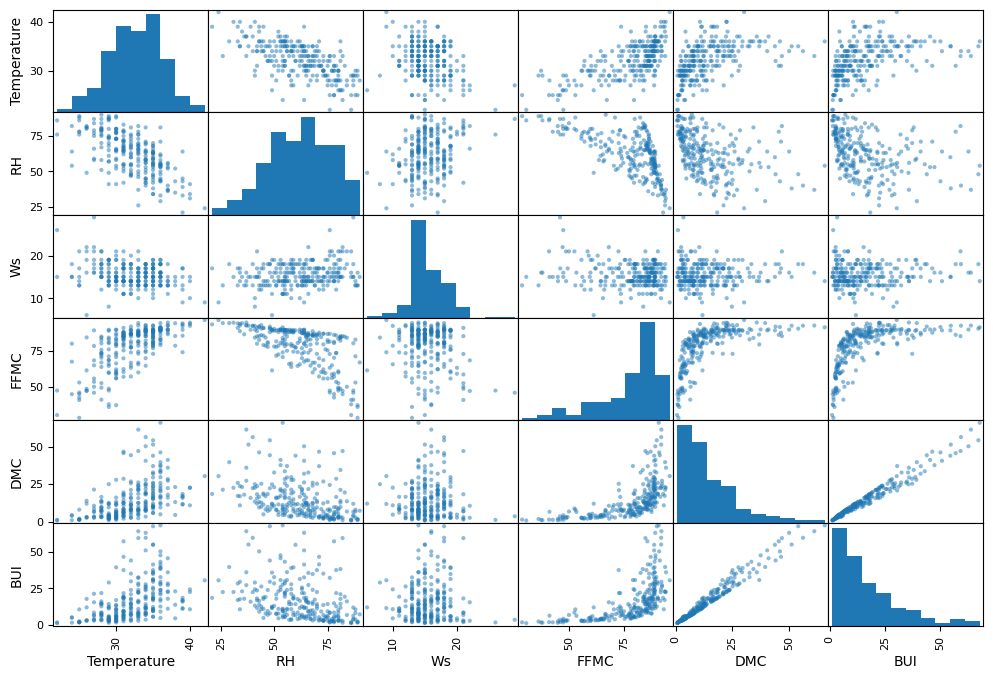

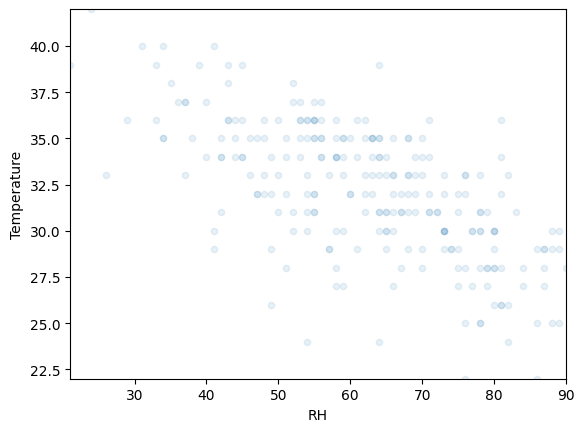

In [9]:


import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

if 'Temperature' in corr_matrix.columns:
    print(corr_matrix["Temperature"].sort_values(ascending=False))
else:
    print("Temperature column not found in the dataset")

attributes = ["Temperature", "RH", "Ws", "FFMC", "DMC", "BUI"]

attributes = [attr for attr in attributes if attr in numeric_df.columns]

scatter_matrix(numeric_df[attributes], figsize=(12, 8))

plt.savefig("scatter_matrix_plot.png")  # Save the plot
plt.show()

if "RH" in numeric_df.columns and "Temperature" in numeric_df.columns:
    numeric_df.plot(kind="scatter", x="RH", y="Temperature", alpha=0.1)

    plt.axis([numeric_df['RH'].min(), numeric_df['RH'].max(),
              numeric_df['Temperature'].min(), numeric_df['Temperature'].max()])

    plt.savefig("RH_vs_Temperature_scatterplot.png")  # Save the scatter plot
    plt.show()
else:
    print("Either 'RH' or 'Temperature' column not found in the dataset.")


Ridge Regression:
Mean Squared Error: 7.3974263339023985
R-squared: 0.4038258382216817
Accuracy: 40.38258382216817%
----------------------------------------
Random Forest Regressor:
Mean Squared Error: 4.689977551020408
R-squared: 0.6220248355263158
Accuracy: 62.202483552631584%
----------------------------------------
Gradient Boosting Regressor:
Mean Squared Error: 4.070804292827787
R-squared: 0.6719253119267079
Accuracy: 67.19253119267078%
----------------------------------------
The best regression model is: Gradient Boosting Regressor with R-squared of 0.6719253119267079
   Actual  Predicted
0      29  28.739045
1      29  30.050487
2      26  25.771084
3      25  25.336828
4      27  27.906508
5      31  31.387700
6      33  33.664853
7      30  30.564848
8      25  25.892670
9      28  29.546132
MSE on the cleaned dataset: 1.48510940814474
R-squared on the cleaned dataset: 0.8867064075924124


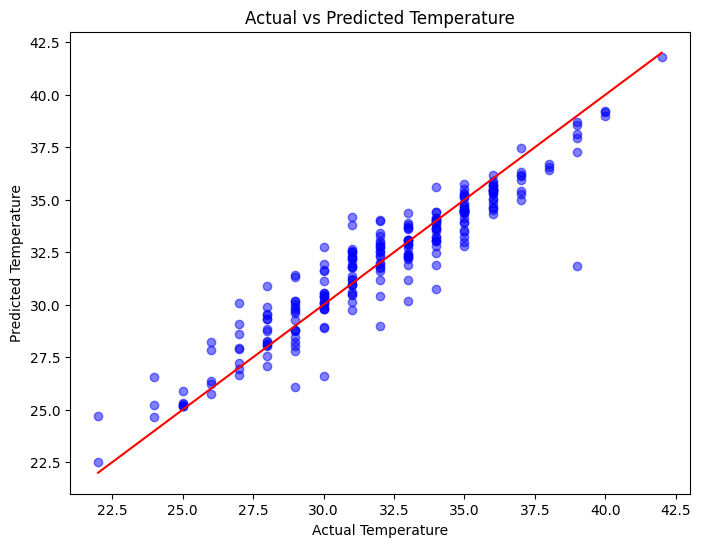

Predictions for new data: [34.72823133 35.31186859 38.80892057]


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Assume df_clean is your cleaned dataset
df_clean = df.dropna().copy()

# Define the feature set and target
X = df_clean[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df_clean['Temperature']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regressors
regressors = {
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Dictionary to store evaluation metrics for each model
results = {}

# Train each model, make predictions, and calculate metrics
for name, model in regressors.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate MSE, R-squared, and accuracy
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test) * 100  # Accuracy as R-squared percentage

    # Store results
    results[name] = {'MSE': mse, 'R-squared': r2, 'Accuracy': accuracy}

    # Print metrics for each model
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Accuracy: {accuracy}%")
    print("-" * 40)

# Find the best regression model based on R-squared
best_model_name = max(results, key=lambda x: results[x]['R-squared'])
best_model = regressors[best_model_name]

# Print the best regression model
print(f"The best regression model is: {best_model_name} with R-squared of {results[best_model_name]['R-squared']}")

# Use the best model for final predictions on the entire dataset
predictions = best_model.predict(X)
df_clean.loc[:, 'Predicted_Temperature'] = predictions  # Add predictions to the dataframe

# Display comparison of actual vs predicted values
comparison = pd.DataFrame({'Actual': df_clean['Temperature'], 'Predicted': df_clean['Predicted_Temperature']})
print(comparison.head(10))  # Show first 10 actual vs predicted

# Calculate MSE and R-squared on the full dataset
mse_full = mean_squared_error(df_clean['Temperature'], df_clean['Predicted_Temperature'])
r2_full = r2_score(df_clean['Temperature'], df_clean['Predicted_Temperature'])
print(f'MSE on the cleaned dataset: {mse_full}')
print(f'R-squared on the cleaned dataset: {r2_full}')

# Scatter plot: Actual vs Predicted Temperature
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Temperature'], df_clean['Predicted_Temperature'], color='blue', alpha=0.5)
plt.plot([df_clean['Temperature'].min(), df_clean['Temperature'].max()],
         [df_clean['Temperature'].min(), df_clean['Temperature'].max()], color='red')  
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

# Predictions for new data using the best model
X_new_data = pd.DataFrame({
    'RH': [30, 45, 60],
    'Ws': [12, 14, 10],
    'Rain': [0.0, 0.0, 1.0],
    'FFMC': [85, 90, 92],
    'DMC': [80, 100, 150],
    'DC': [300, 350, 400],
    'ISI': [5, 8, 10],
    'BUI': [50, 60, 70],
    'FWI': [20, 25, 30]
})

predictions_new = best_model.predict(X_new_data)
print("Predictions for new data:", predictions_new)
